# Selective Withdrawal Phenomena and Entrainment

Here we'll study the critical moment when the withdrawal Phenomena transitions from selective to entrainment.

In [27]:
# Import required packages

import numpy as np
import pandas as pd 
%matplotlib inline 
# %matplotlib notebook #for displaying plots in the notebook under cells with interactivity 
# %matplotlib nbagg #for displaying plots in the notebook under cells with interactivity  


import os
for dirname, _, filenames in os.walk('C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))







C:\Users\sabbi\Dropbox\Darryl James\Mendeley_library\JetEntrainment\Selective\Qualifying_docs\SW_Python\input\cohen.csv
C:\Users\sabbi\Dropbox\Darryl James\Mendeley_library\JetEntrainment\Selective\Qualifying_docs\SW_Python\input\single.csv
C:\Users\sabbi\Dropbox\Darryl James\Mendeley_library\JetEntrainment\Selective\Qualifying_docs\SW_Python\input\utube.csv


# Preparing data

In [28]:
# Loading data file

data_single = pd.read_csv("C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input\\single.csv")
data_single.head()


,Fluids,PDMS _rho (kg/m^3),PDMS_nu (cSt),Water_rho (kg/m^3),Water_nu (cSt),Interfacial Tension (N/m),Tube,ID (m),Flow Rate (GPM),Submergence S (in),Layer Depth (in),day,temp
0,5 cSt PDMS/DI water,918,5,998,1.01,0.03,1/2 SS,0.010795,2.95,0.338,1.0,1,27.5
1,5 cSt PDMS/DI water,918,5,998,1.01,0.03,1/2 SS,0.010795,3.03,0.393,1.0,1,25.4
2,5 cSt PDMS/DI water,918,5,998,1.01,0.03,1/2 SS,0.010795,3.05,0.381,1.0,1,26.7
3,5 cSt PDMS/DI water,918,5,998,1.01,0.03,1/2 SS,0.010795,3.49,0.392,1.0,1,26.7
4,5 cSt PDMS/DI water,918,5,998,1.01,0.03,1/2 SS,0.010795,3.53,0.441,1.0,1,26.7


In [29]:
data_single.columns=['fluids', 'upper_rho', 'upper_nu', 'lower_rho','lower_nu', 'gamma', 'tubetype', 'dia',
       'Q', 'S', 'depth', 'day','temp']


# df.rename(columns = {'$b':'B'}, inplace = True)

data_single.drop(['tubetype','depth','day','temp'], axis=1, inplace=True)

# df = df.drop(df.columns[[0, 1, 3]], axis=1)

data_single['Q'] = (0.00006309 * data_single['Q'])
data_single['S'] = (0.0254 * data_single['S'])
data_single['lower_nu'] = (data_single['lower_nu']*(1e-6))
data_single['upper_nu'] = (data_single['upper_nu']*(1e-6))
data_single['fluids'] = data_single.fluids.astype("category").cat.codes
data_single['g_reduced'] = 9.81 * (1 - (data_single['upper_rho'] / data_single['lower_rho']))

# Capillary length
data_single['lc']= (data_single['gamma'] / (data_single['g_reduced'] * data_single['lower_rho'])) ** (1/2)

data_single['lc_d'] = data_single['lc'] / data_single['dia']

data_single['S_d'] = data_single['S'] / data_single['dia']
data_single['S_lc'] = data_single['S'] / data_single['lc']


data_single['nu_ratio'] = data_single['upper_rho'] / data_single['lower_rho']
data_single['rho_ratio'] = data_single['upper_nu'] / data_single['lower_nu']

data_single['V_tube'] = data_single['Q'] / ((np.pi/4) * (data_single['dia'] ** 2))

data_single['Re_d'] = data_single['Q'] / (data_single['lower_nu'] * data_single['dia'])

data_single['Fr_lc'] = ((data_single['Q'] ** 2) / (data_single['g_reduced'] * data_single['lc'] * (data_single['dia'] ** 4))) ** (1/2)
data_single['Fr_dia'] = ((data_single['Q'] ** 2) / (data_single['g_reduced'] * data_single['dia'] * (data_single['dia'] ** 4))) ** (1/2)
data_single['We_lc'] = (data_single['lower_rho'] * data_single['lc'] * (data_single['Q'] ** 2) / (data_single['gamma'] * (data_single['dia'] ** 4)))

data_single.head() 

,fluids,upper_rho,upper_nu,lower_rho,lower_nu,gamma,dia,Q,S,g_reduced,...,lc_d,S_d,S_lc,nu_ratio,rho_ratio,V_tube,Re_d,Fr_lc,Fr_dia,We_lc
0,6,918,0.000005,998,0.000001,0.03,0.010795,0.000186,0.008585,0.786373,...,0.572741,0.795294,1.388575,0.91984,4.950495,2.033515,17070.196598,22.905114,17.334515,524.644249
1,6,918,0.000005,998,0.000001,0.03,0.010795,0.000191,0.009982,0.786373,...,0.572741,0.924706,1.614526,0.91984,4.950495,2.088661,17533.117184,23.526270,17.804604,553.485365
2,6,918,0.000005,998,0.000001,0.03,0.010795,0.000192,0.009677,0.786373,...,0.572741,0.896471,1.565228,0.91984,4.950495,2.102448,17648.847330,23.681559,17.922126,560.816217
3,6,918,0.000005,998,0.000001,0.03,0.010795,0.000220,0.009957,0.786373,...,0.572741,0.922353,1.610418,0.91984,4.950495,2.405752,20194.910552,27.097915,20.507613,734.296974
4,6,918,0.000005,998,0.000001,0.03,0.010795,0.000223,0.011201,0.786373,...,0.572741,1.037647,1.811720,0.91984,4.950495,2.433325,20426.370845,27.408492,20.742657,751.225455


In [30]:
# Loading data file

data_utube = pd.read_csv("C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input\\utube.csv")
data_utube.head()

,Fluids,PDMS _rho (kg/m^3),PDMS_nu (cSt),Water_rho (kg/m^3),Water_nu (cSt),Interfacial Tension (N/m),Tube,ID (m),Flow Rate (GPM),Submergence S (in),Layer Depth (in)
0,5 cSt PDMS/CaCl2 Brine,918,5,1245,1.97,0.038,1/2 SS,0.010795,2.380771,0.593,1
1,5 cSt PDMS/CaCl2 Brine,918,5,1245,1.97,0.038,1/2 SS,0.010795,4.136289,0.687,1
2,5 cSt PDMS/CaCl2 Brine,918,5,1245,1.97,0.038,1/2 SS,0.010795,1.707422,0.521,1
3,5 cSt PDMS/CaCl2 Brine,918,5,1245,1.97,0.038,1/2 SS,0.010795,3.214442,0.653,1
4,5 cSt PDMS/CaCl2 Brine,918,5,1245,1.97,0.038,1/2 SS,0.010795,0.873751,0.497,1


In [31]:
data_utube.columns=['fluids', 'upper_rho', 'upper_nu', 'lower_rho','lower_nu', 'gamma', 'tubetype', 'dia',
       'Q', 'S', 'depth']


# df.rename(columns = {'$b':'B'}, inplace = True)

data_utube.drop(['tubetype','depth'], axis=1, inplace=True)

# df = df.drop(df.columns[[0, 1, 3]], axis=1)

data_utube['Q'] = (0.00006309 * data_utube['Q'])
data_utube['S'] = (0.0254 * data_utube['S'])
data_utube['lower_nu']=(data_utube['lower_nu'] * (1e-6))
data_utube['upper_nu']=(data_utube['upper_nu'] * (1e-6))
data_utube['fluids'] = data_utube.fluids.astype("category").cat.codes
data_utube['g_reduced'] = 9.81 * (1 - (data_utube['upper_rho'] / data_utube['lower_rho']))

# Capillary length
data_utube['lc']= (data_utube['gamma'] / (data_utube['g_reduced'] * data_utube['lower_rho'])) ** (1/2)

data_utube['lc_d'] = data_utube['lc'] / data_utube['dia']

data_utube['S_d'] = data_utube['S'] / data_utube['dia']
data_utube['S_lc'] = data_utube['S'] / data_utube['lc']


data_utube['nu_ratio'] = data_utube['upper_rho'] / data_utube['lower_rho']
data_utube['rho_ratio'] = data_utube['upper_nu'] / data_utube['lower_nu']

data_utube['V_tube'] = data_utube['Q'] / ((np.pi/4) * (data_utube['dia'] ** 2))

data_utube['Re_d'] = data_utube['Q'] / (data_utube['lower_nu'] * data_utube['dia'])

data_utube['Fr_lc'] = ((data_utube['Q'] ** 2) / (data_utube['g_reduced'] * data_utube['lc'] * (data_utube['dia'] ** 4))) ** (1/2)
data_utube['Fr_dia'] = ((data_utube['Q'] ** 2) / (data_utube['g_reduced'] * data_utube['dia'] * (data_utube['dia'] ** 4))) ** (1/2)
data_utube['We_lc'] = (data_utube['lower_rho'] * data_utube['lc'] * (data_utube['Q'] ** 2) / (data_utube['gamma'] * (data_utube['dia'] ** 4)))

data_utube.head() 

,fluids,upper_rho,upper_nu,lower_rho,lower_nu,gamma,dia,Q,S,g_reduced,...,lc_d,S_d,S_lc,nu_ratio,rho_ratio,V_tube,Re_d,Fr_lc,Fr_dia,We_lc
0,4,918,0.000005,1245,0.000002,0.038,0.010795,0.000150,0.015062,2.576602,...,0.318831,1.395294,4.376279,0.737349,2.538071,1.641130,7063.001422,13.687290,7.728547,187.341900
1,4,918,0.000005,1245,0.000002,0.038,0.010795,0.000261,0.017450,2.576602,...,0.318831,1.616471,5.069989,0.737349,2.538071,2.851256,12271.073180,23.779938,13.427374,565.485436
2,4,918,0.000005,1245,0.000002,0.038,0.010795,0.000108,0.013233,2.576602,...,0.318831,1.225882,3.844926,0.737349,2.538071,1.176972,5065.384860,9.816137,5.542695,96.356547
3,4,918,0.000005,1245,0.000002,0.038,0.010795,0.000203,0.016586,2.576602,...,0.318831,1.536471,4.819073,0.737349,2.538071,2.215802,9536.240978,18.480145,10.434839,341.515773
4,4,918,0.000005,1245,0.000002,0.038,0.010795,0.000055,0.012624,2.576602,...,0.318831,1.169412,3.667809,0.737349,2.538071,0.602300,2592.145303,5.023281,2.836403,25.233356


In [32]:
# Loading data file

data_cohen = pd.read_csv("C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input\\cohen.csv")
data_cohen.head()

,UpperFluid,LowerFluid,GammaInterface_Dy_cm,rhoU_g_ml,rhoL_g_ml,viscU_g_cms,viscL_g_cms,Kusat_1_cm,Q_ml_sec,S_cm
0,LMO,H2O,34,0.85,1.0,0.48,0.01,5,0.022178,0.095151
1,LMO,H2O,34,0.85,1.0,0.48,0.01,5,0.122950,0.158975
2,LMO,H2O,34,0.85,1.0,0.48,0.01,5,0.217578,0.190651
3,LMO,H2O,34,0.85,1.0,0.48,0.01,5,0.367215,0.221452
4,LMO,H2O,34,0.85,1.0,0.48,0.01,5,0.563409,0.254458


In [33]:
data_cohen['dia'] = pd.DataFrame(np.tile(0.0016,(len(data_cohen),1)),columns=['dia'])
data_cohen['fluids'] = data_cohen['UpperFluid'] + data_cohen['LowerFluid']
data_cohen['fluids'] = data_cohen.fluids.astype("category").cat.codes

data_cohen.drop(['Kusat_1_cm','UpperFluid','LowerFluid'], axis=1, inplace=True)

data_cohen.columns = ['gamma', 'upper_rho', 'lower_rho', 'upper_nu','lower_nu', 'Q', 'S', 'dia','fluids']

data_cohen['gamma'] = data_cohen['gamma'] * 0.001
data_cohen['lower_rho'] = data_cohen['lower_rho'] * 1000
data_cohen['upper_rho'] = data_cohen['upper_rho'] * 1000
data_cohen['Q'] = data_cohen['Q'] * (1e-06)
data_cohen['S'] = data_cohen['S'] / 100
data_cohen['lower_nu']=(data_cohen['lower_nu'] * 0.1) / data_cohen['lower_rho']
data_cohen['upper_nu']=(data_cohen['upper_nu'] * 0.1) / data_cohen['upper_rho']

data_cohen['g_reduced'] = 9.81 * (1 - (data_cohen['upper_rho'] / data_cohen['lower_rho']))

# Capillary length
data_cohen['lc']= (data_cohen['gamma'] / (data_cohen['g_reduced'] * data_cohen['lower_rho'])) ** (1/2)

data_cohen['lc_d'] = data_cohen['lc'] / data_cohen['dia']

data_cohen['S_d'] = data_cohen['S'] / data_cohen['dia']
data_cohen['S_lc'] = data_cohen['S'] / data_cohen['lc']


data_cohen['nu_ratio'] = data_cohen['upper_rho'] / data_cohen['lower_rho']
data_cohen['rho_ratio'] = data_cohen['upper_nu'] / data_cohen['lower_nu']

data_cohen['V_tube'] = data_cohen['Q'] / ((np.pi/4) * (data_cohen['dia'] ** 2))

data_cohen['Re_d'] = data_cohen['Q'] / (data_cohen['lower_nu'] * data_cohen['dia'])

data_cohen['Fr_lc'] = ((data_cohen['Q'] ** 2) / (data_cohen['g_reduced'] * data_cohen['lc'] * (data_cohen['dia'] ** 4))) ** (1/2)
data_cohen['Fr_dia'] = ((data_cohen['Q'] ** 2) / (data_cohen['g_reduced'] * data_cohen['dia'] * (data_cohen['dia'] ** 4))) ** (1/2)
data_cohen['We_lc'] = (data_cohen['lower_rho'] * data_cohen['lc'] * (data_cohen['Q'] ** 2) / (data_cohen['gamma'] * (data_cohen['dia'] ** 4)))

data_cohen.head() 



,gamma,upper_rho,lower_rho,upper_nu,lower_nu,Q,S,dia,fluids,g_reduced,...,lc_d,S_d,S_lc,nu_ratio,rho_ratio,V_tube,Re_d,Fr_lc,Fr_dia,We_lc
0,0.034,850.0,1000.0,0.000056,0.000001,2.217810e-08,0.000952,0.0016,2,1.4715,...,3.004273,0.594697,0.197950,0.85,56.470588,0.011030,13.861310,0.103009,0.178544,0.010611
1,0.034,850.0,1000.0,0.000056,0.000001,1.229499e-07,0.001590,0.0016,2,1.4715,...,3.004273,0.993591,0.330726,0.85,56.470588,0.061150,76.843706,0.571056,0.989802,0.326105
2,0.034,850.0,1000.0,0.000056,0.000001,2.175781e-07,0.001907,0.0016,2,1.4715,...,3.004273,1.191570,0.396625,0.85,56.470588,0.108214,135.986320,1.010568,1.751601,1.021247
3,0.034,850.0,1000.0,0.000056,0.000001,3.672151e-07,0.002215,0.0016,2,1.4715,...,3.004273,1.384075,0.460702,0.85,56.470588,0.182638,229.509416,1.705575,2.956245,2.908985
4,0.034,850.0,1000.0,0.000056,0.000001,5.634090e-07,0.002545,0.0016,2,1.4715,...,3.004273,1.590361,0.529366,0.85,56.470588,0.280217,352.130595,2.616821,4.535693,6.847751


# Plotting data grouped by labels

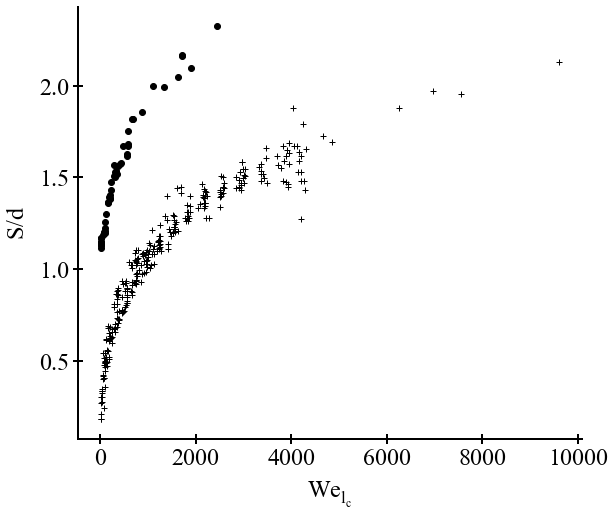

In [37]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Collect all the font names available to matplotlib
#font_names = [f.name for f in fm.fontManager.ttflist]
#print(font_names)

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 24
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
# (width, height) in inches
fig = plt.figure(figsize=(7, 6))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Adding log scales in axis
#plt.xscale('log')
#plt.yscale('log')

# Adding linear scales in axis
plt.xscale('linear')
plt.yscale('linear')

#Adding TItle for the figure
# plt.title('S/d vs We')

# Add two axes objects to create an inset figure
#ax1 = fig.add_axes([0, 0, 1, 1])
#ax2 = fig.add_axes([0.5, 0.5, 0.4, 0.4])

# Hide the top and right spines of the axis
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='inout')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='inout')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='inout')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='inout')

# Add the axis label with latex expressions
ax.set_xlabel(r'$\mathregular{We_{l_c}}$', labelpad=10)
ax.set_ylabel(r'$\mathregular{S/d}$', labelpad=10)

# Plot and show our data

# Creating the groups for legend
groups = data_single.groupby("fluids")
for l, grp in groups:
    ax.plot(grp['We_lc'], grp['S_d'],'k+',label = l)
groups2 = data_utube.groupby("fluids")
for l, grp in groups2:
    ax.plot(grp['We_lc'], grp['S_d'],'ko',label = l)

# Enabling legends
#ax.legend(loc='lower right', frameon=True)


# Save the figure
fig.savefig('C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\output\\Q_vs_S.png', dpi=300, transparent=False, bbox_inches='tight')

plt.show()